## Iris Segmentation

Here we will attempt to perform iris segmentation using thresholding on grayscale images. The hope is to be able to find the outline of the pupil, as well as the eye catchlight.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

'3.2.0'

#### Turning to Grayscale

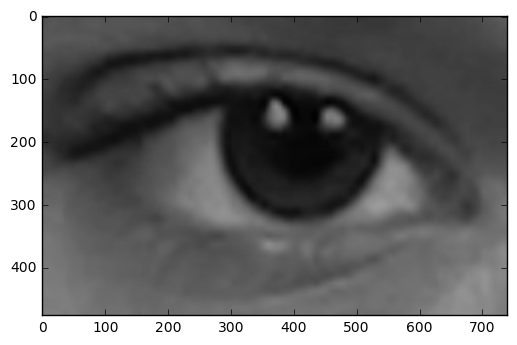

In [2]:
#Let's keep the color image, so we can see the contours there
img = Image.open('eye1.png').convert('LA')
img.save('grayscale.png')
plt.imshow(img)
plt.show()

#### Thresholding and morphing

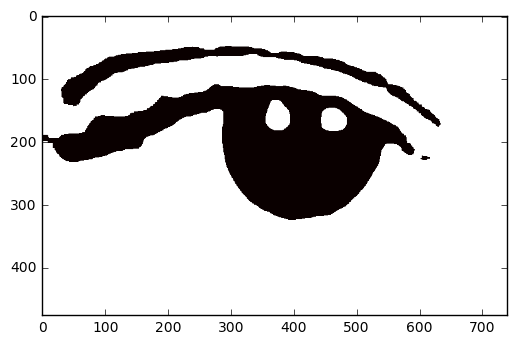

In [3]:
#getting appropriate format for cv2
a = list(img.getdata())
a2 = [i[0] for i in a]
a2 = np.asarray(a2)
#thresholding
ret,thresh1 = cv2.threshold(a2.astype(np.uint8),45,255,cv2.THRESH_BINARY)
thresh1 = np.reshape(thresh1,(img.size[1],img.size[0]))
#we use erosion and dilation to remove noise
morphKernel = np.ones((10, 10), np.uint8)
morph = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, morphKernel)
#plot resulting image
imgMorph = Image.fromarray(morph, 'L')
plt.imshow(imgMorph, cmap = 'hot')
plt.show()

#### Drawing contours

uint8
uint8
uint8


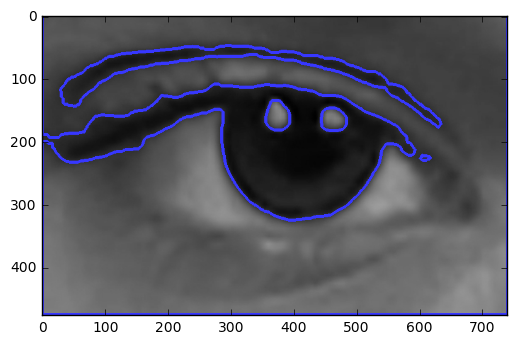

In [18]:

#target2 = cv2.imread('eye2.png', cv2.IMREAD_COLOR)
target = cv2.imread('grayscale.png', cv2.IMREAD_COLOR )
temp = target.copy()

_, contours, hierarchy = cv2.findContours(morph.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(temp, contours, -1, (55, 55, 555), 3)

plt.imshow(temp)
plt.show()

### Catching the catchlight

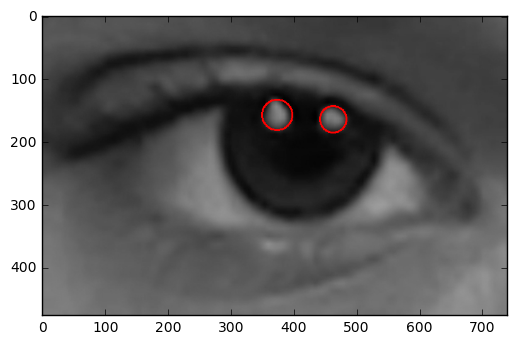

In [5]:
### I manually checked that contours 1 and 0 correspond to the catchlights.

(x, y), radius = cv2.minEnclosingCircle(contours[1])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target, centre, radius, (255, 0, 0), 2)

(x, y), radius = cv2.minEnclosingCircle(contours[0])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target, centre, radius, (255, 0, 0), 2)

plt.imshow(target)
plt.show()

### Using the uncropped image.

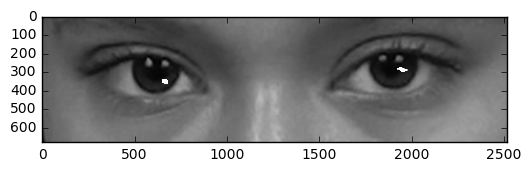

In [6]:
#Let's keep the color image, so we can see the contours there
img_full = Image.open('full2.png').convert('LA')
img_full.save('grayscale_full.png')
plt.imshow(img_full)
plt.show()

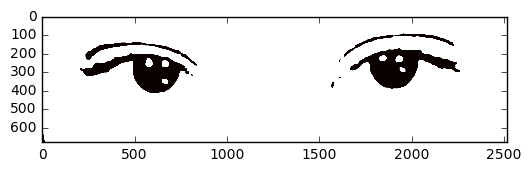

In [7]:
#getting appropriate format for cv2
a = list(img_full.getdata())
a2 = [i[0] for i in a]
a2 = np.asarray(a2)
#thresholding
ret_full,thresh_full = cv2.threshold(a2.astype(np.uint8),45,255,cv2.THRESH_BINARY)
thresh_full = np.reshape(thresh_full,(img_full.size[1],img_full.size[0]))
#we use erosion and dilation to remove noise
morphKernel = np.ones((10, 10), np.uint8)
morph_full = cv2.morphologyEx(thresh_full, cv2.MORPH_OPEN, morphKernel)
#plot resulting image
imgMorph_full = Image.fromarray(morph_full, 'L')
plt.imshow(imgMorph_full, cmap = 'hot')
plt.show()

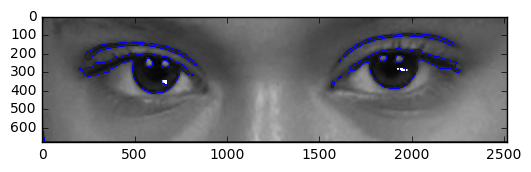

In [8]:
target_full = cv2.imread('grayscale_full.png', cv2.IMREAD_COLOR )
temp_full = target_full.copy()

_, contours_full, hierarchy_full = cv2.findContours(morph_full.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(temp_full, contours_full, -1, (0, 0, 255), 3)

plt.imshow(temp_full)
plt.show()

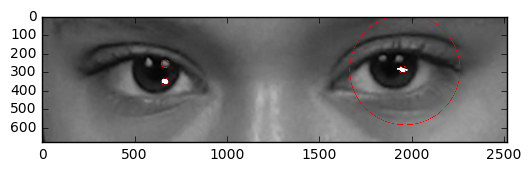

In [9]:
(x, y), radius = cv2.minEnclosingCircle(contours_full[9])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target_full, centre, radius, (255, 0, 0), 2)

(x, y), radius = cv2.minEnclosingCircle(contours_full[10])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target_full, centre, radius, (255, 0, 0), 2)

(x, y), radius = cv2.minEnclosingCircle(contours_full[12])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target_full, centre, radius, (255, 0, 0), 2)

(x, y), radius = cv2.minEnclosingCircle(contours_full[13])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target_full, centre, radius, (255, 0, 0), 2)


plt.imshow(target_full)
plt.show()

2


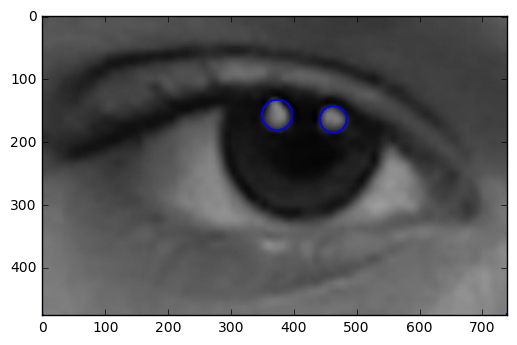

In [10]:
#trying to automatically identify catchlight contours
#checks for largest contour, and takes all their children

largest = 0
for i in range(0,len(contours)):
    if (cv2.contourArea(contours[i]) > cv2.contourArea(contours[largest])):
        largest = i
tgt = cv2.imread('grayscale.png', cv2.IMREAD_COLOR )

print largest

for i in range(0,len(contours)):
    #for some reasone the highlights do not have a parent hierarcy = largest (2)
    #they seem to have no parent (-1)
    #this works in the full picture, possibly because of the existence of a huge father-contour
    if (hierarchy[0][i][3] == -1):
        (x, y), radius = cv2.minEnclosingCircle(contours[i])
        centre = (int(x), int(y))
        radius = int(radius)
        cv2.circle(tgt, centre, radius, (0, 0, 255), 2)
        
plt.imshow(tgt)
plt.show()


12 59981.5
8 58205.0


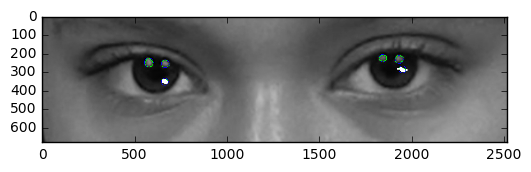

In [11]:
#Now for full
#trying to automatically identify catchlight contours
#checks for largest 2 contours, and takes all their children
tgt_full = cv2.imread('grayscale_full.png', cv2.IMREAD_COLOR)
largest = [1,2]
for i in range(3,len(contours_full)):
    if (cv2.contourArea(contours_full[i]) > cv2.contourArea(contours_full[largest[0]])):
        largest[1] = largest[0]
        largest[0] = i
    elif (cv2.contourArea(contours_full[largest[0]]) > cv2.contourArea(contours_full[i]) > cv2.contourArea(contours_full[largest[1]])):
        largest[1] = i

print largest[0], cv2.contourArea(contours_full[largest[0]])
print largest[1], cv2.contourArea(contours_full[largest[1]])

for i in range(0,len(contours_full)):
    if (hierarchy_full[0][i][3] == largest[0])or(hierarchy_full[0][i][3] == largest[1]):
        (x, y), radius = cv2.minEnclosingCircle(contours_full[i])
        centre = (int(x), int(y))
        radius = int(radius)
        #mask = np.zeros(tgt_full.shape,np.uint8)
        #cv2.drawContours(mask,contours_full[i],0,255,-1)
        #print "Catchlight intensity: " +  cv2.mean(tgt_full,mask)
        cv2.circle(tgt_full, centre, radius, (0, 0, 255), 2)
        cv2.drawContours(tgt_full, contours_full[i], -1, (0, 255, 0), 3)
        
        
        
plt.imshow(tgt_full)
plt.show()

## Blink Detection

We find a pixel that is likely to be within the white part of the eye when open, and check it's brightness to determine whether the eye is closed. We try to use multiple pixels for verification.

2 out of 3 pixels bright.
Prediction: The eye is open


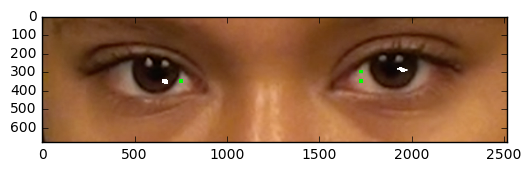

In [12]:
img_full_blink = Image.open('full2.png')
img_full_blink_grey = img_full_blink.convert('LA')
#define pixels and thresholds
check_pixels = ((1725,350),(1725, 300),(750,350))
blink_thresh = 140
blink_thresh2 = 0.7
#check pixels, and draw them
brights = 0
for pixel in check_pixels:
    for i in range(pixel[0]-10,pixel[0]+10):
        for j in range(pixel[1]-10,pixel[1]+10):
            img_full_blink.load()[i,j] = (0,255,0,255)
    if img_full_blink_grey.load()[pixel[0],pixel[1]][0] < blink_thresh:
        brights = brights + 1
print str(brights) + " out of " + str(len(check_pixels)) + " pixels bright."
if (float(float(brights)/float(len(check_pixels))) >= blink_thresh2):
    print "Prediction: The eye is closed"
else:
    print "Prediction: The eye is open"
    
plt.imshow(img_full_blink)
plt.show()


Let's try to find optimal pixels by examining several (open) pictures, and looking near the iris. We start with one:

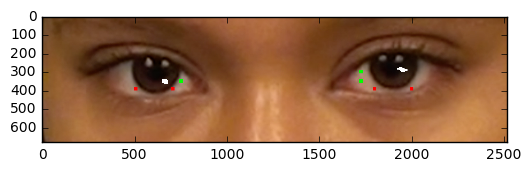

In [13]:
#use previous contours, find bottom most point of iris, go left and right some pixels
offset = 100
bottommost0 = tuple(contours_full[largest[0]][contours_full[largest[0]][:,:,1].argmax()][0])
bottommost1 = tuple(contours_full[largest[1]][contours_full[largest[1]][:,:,1].argmax()][0])
point00 = (bottommost0[0]-offset,bottommost0[1])
point01 = (bottommost0[0]+offset,bottommost0[1])
point10 = (bottommost1[0]-offset,bottommost0[1])
point11 = (bottommost1[0]+offset,bottommost0[1])
check_pixels2 = (point00,point01,point10,point11)

for pixel in check_pixels2:
    for i in range(pixel[0]-10,pixel[0]+10):
        for j in range(pixel[1]-10,pixel[1]+10):
            img_full_blink.load()[i,j] = (255,0,0,255)
plt.imshow(img_full_blink)
plt.show()

Next, we check a group of pictures with different values of offset and find when it's consistently the brightest. We can also use it to optimize the brightness threshold. We can do this calibration once for each video if we want.

In [14]:
#using Ray's code to get the frames
vidcap = cv2.VideoCapture('2012-07-16-13.25.47_1_crop.mov')
#print vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
for i in range(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))):
#for i in range(0,100):
    success,image = vidcap.read()
    if success == False: break
    
    #cv2.imwrite("SampleFrames/frame%d.jpg" % i, image)     # save frame as JPEG file
    #if (i%10 == 0):
    #    plt.imshow(image)
    #    plt.show()

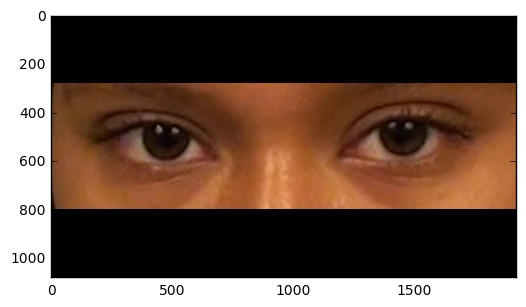

In [16]:
frame = Image.open("SampleFrames/frame12.jpg")
plt.imshow(frame)
plt.show()